## Data load,pre-processing 


In [3]:
!pip install pmdarima

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
df=pd.read_csv("Walmart (1).csv")
df=df[df["Holiday_Flag"]!="Holiday_Flag"]
df.shape

(12873, 8)

In [3]:
df.head(5)

Store        Date Weekly_Sales Holiday_Flag Temperature Fuel_Price  \
0     1  05-02-2010    1643690.9            0       42.31      2.572   
1     1  12-02-2010   1641957.44            1       38.51      2.548   
2     1  19-02-2010   1611968.17            0       39.93      2.514   
3     1  26-02-2010   1409727.59            0       46.63      2.561   
4     1  05-03-2010   1554806.68            0        46.5      2.625   

           CPI Unemployment  
0  211.0963582        8.106  
1  211.2421698        8.106  
2  211.2891429        8.106  
3  211.3196429        8.106  
4  211.3501429        8.106

## Univariate analysis

In [4]:
df.Store.nunique() #45 stores

48

In [5]:
df.describe()

Store        Date Weekly_Sales Holiday_Flag Temperature Fuel_Price  \
count   12873       12870        12870        12870       12870      12870   
unique     48         143         6435            2        3528        892   
top         1  05-02-2010    1643690.9            0       50.43      3.638   
freq      286          90            2        11970          22         78   

                CPI Unemployment  
count         12870        12870  
unique         2145          349  
top     130.5502069        8.099  
freq             22          156

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 0 to 12873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         12873 non-null  object
 1   Date          12870 non-null  object
 2   Weekly_Sales  12870 non-null  object
 3   Holiday_Flag  12870 non-null  object
 4   Temperature   12870 non-null  object
 5   Fuel_Price    12870 non-null  object
 6   CPI           12870 non-null  object
 7   Unemployment  12870 non-null  object
dtypes: object(8)
memory usage: 905.1+ KB


In [7]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data cleaning


In [3]:
# CHECK THE MISSING VALUES
df.isnull().sum()

Store           0
Date            3
Weekly_Sales    3
Holiday_Flag    3
Temperature     3
Fuel_Price      3
CPI             3
Unemployment    3
dtype: int64

In [4]:
#drop Missing values
df=df.dropna()
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
#Check duplicate values
df.duplicated().sum()

6435

In [6]:
#drop duplicates
df=df.drop_duplicates()
#check duplicates removed
df.duplicated().sum()

0

## Data Transformation


In [7]:
# Data types conversion
df['Store']=df['Store'].astype('int')
df['Holiday_Flag']=df['Holiday_Flag'].astype('int')
df['Date']=df['Date'].astype('datetime64')
df['Weekly_Sales']=df['Weekly_Sales'].astype('float')
df['Temperature']=df['Temperature'].astype('float')
df['Fuel_Price']=df['Fuel_Price'].astype('float')
df['CPI']=df['CPI'].astype('float')
df['Unemployment']=df['Unemployment'].astype('float')

In [8]:
#Splitting Date Column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int32         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int32         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(3)
memory usage: 553.0 KB


In [14]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month         Week  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524    26.000000  
std      39.356712      1.875885     0.797019     3.321797    14.511794  
min     126.064000      3.879000  2010.000000     1.000000     1.000000  
25%     131.735000      6.891000  2010.000000     4.000000    14.000000  
50%     182.616521      7.874000  2011.000000     6.000000    26.000000  
75%     212.743293      8.622000  2012.000000     9.000000    38.000000  
max     227.232807     14.313000  2012.000000    12.000000    52.000000

<AxesSubplot:>

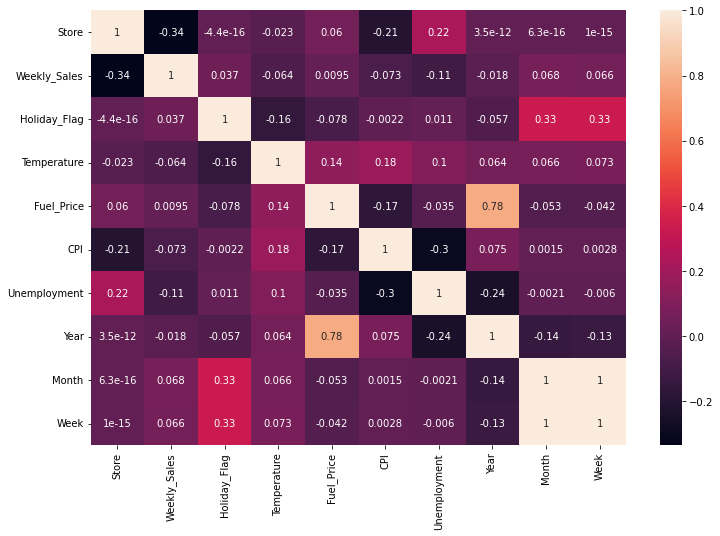

In [15]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
# store cleaned data
df.to_csv('clean_data.csv',index=False)

## Checking Seasonality

In [10]:
new_data = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
new_data = new_data.set_index('Date')
new_data.index.name='Date'

In [18]:
#adfuller test
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(new_data['Weekly_Sales'])

1. ADF :  -9.837721580746784
2. P-Value :  4.84510284992098e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 142
5. Critical Values :
	 1% :  -3.477261624048995
	 5% :  -2.8821181874544233
	 10% :  -2.5777431104939494


In [19]:
#KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(dataset):
    kpsstest = kpss(dataset, regression ='c')
    print("1. ADF : ",kpsstest[0])
    print("2. P-Value : ", kpsstest[1])
    print("3. Num Of Lags : ", kpsstest[2])
    print("4. Num Of Observations Used For kpss Regression:",kpsstest[3])
    
kpss_test(new_data["Weekly_Sales"].values)

1. ADF :  0.04531969888714752
2. P-Value :  0.1
3. Num Of Lags :  3
4. Num Of Observations Used For kpss Regression: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


#### Based on  p-values, the ADF test suggests that the time series is stationary (p=0.000117<0.05), while the KPSS test suggests the opposite (p=0.01>0.05). This discrepancy may indicate that the time series has a more complex behavior than a simple trend

<AxesSubplot:xlabel='Date'>

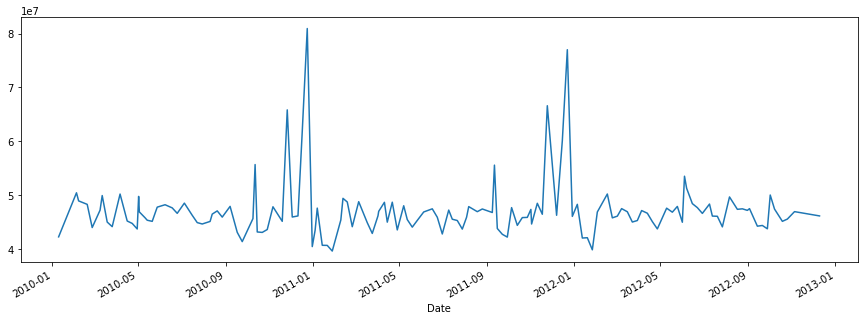

In [11]:
new_data.Weekly_Sales.plot(figsize=(15,5))

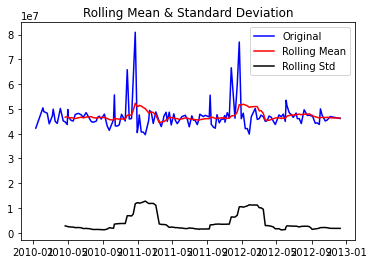

In [21]:
#Determing rolling statistics
rolmean = new_data['Weekly_Sales'].rolling(12).mean()
rolstd = new_data['Weekly_Sales'].rolling(12).std()
 #Plot rolling statistics:
orig = plt.plot(new_data['Weekly_Sales'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Time series data transformation

In [12]:
data=np.log(new_data)
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)


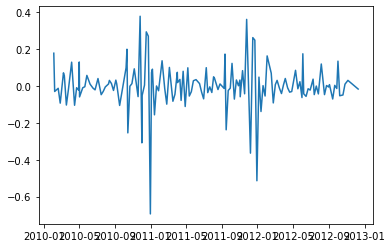

In [13]:
data=pd.DataFrame(data - data.shift())
plt.plot(data)

In [24]:
# drop null values
data=data.dropna()

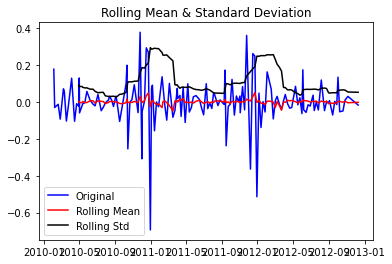

In [25]:
#Determing rolling statistics
rolmean = data['Weekly_Sales'].rolling(12).mean()
rolstd = data['Weekly_Sales'].rolling(12).std()
 #Plot rolling statistics:
orig = plt.plot(data['Weekly_Sales'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

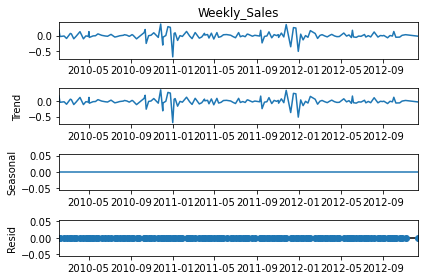

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(data['Weekly_Sales'],model='additive', extrapolate_trend='freq', period=1)
decompose_result.plot()
plt.show()

### Choosing the Algorithm for the Project

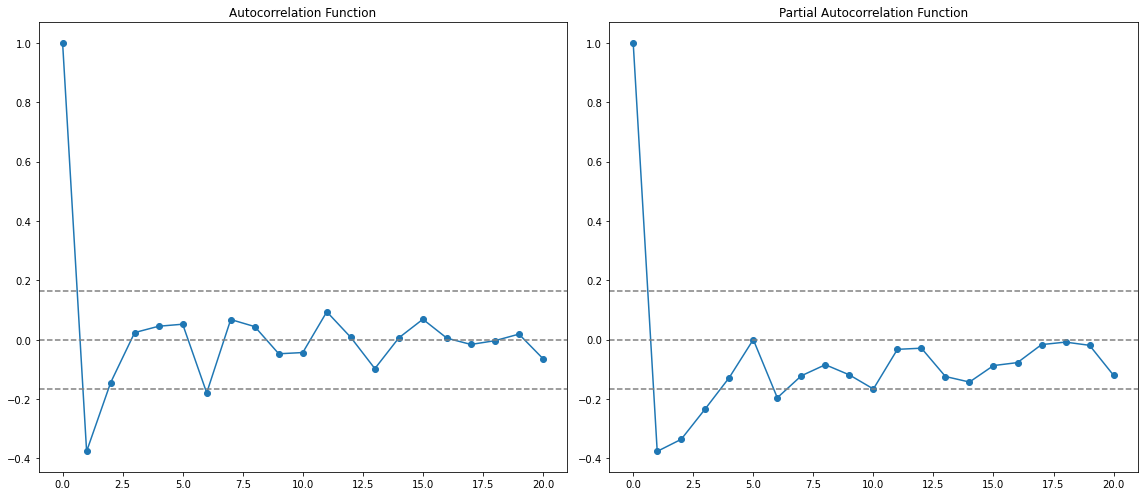

In [27]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [28]:
# chect autoarima
stepwise_fit = auto_arima(data['Weekly_Sales'],trace=True,suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-181.336, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-201.177, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-183.333, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-216.150, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-222.025, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-222.330, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-220.330, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-240.372, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(4, 0, 1)   Log Likelihood                 127.186
Date:                Sun, 05 Feb 2023   AIC                           -240.372
Time:                        01:28:54   BIC                           -219.681
Sample:                             0   HQIC                          -231.964
                                - 142                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    5.67e-05      0.000      0.150      0.881      -0.001       0.001
ar.L1          0.2107      0.076      2.773      0.006       0.062       0.360
ar.L2         -0.0769      0.077     -0.994      0.320      -0.229       0.075
ar.L3          0.0646      0.076      0.851      0.395      -0.084       0.213
ar.L4          0.0319      0.070      0.454      0.650      -0.106       0.169
ma.L1         -0.9879      0.111     -8.880      0.000      -1.206      -0.770
sigma2         0.0096      0.001      8.041      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               463.16
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             2.16
Prob(H) (two-sided):                  0.14   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

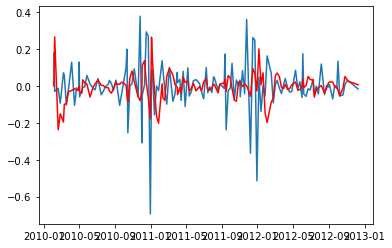

In [29]:
#Arima Model
model1 = ARIMA(data, order=(5,2,2))  
model1_fit = model1.fit()  
plt.plot(data)
plt.plot(model1_fit.fittedvalues, color='red')

In [30]:
forecast1 = model1_fit.predict(start=0,end=141)
forecast1

2010-02-04    0.000000
2010-02-07    0.265649
2010-02-19   -0.237757
2010-02-26   -0.151282
2010-03-09   -0.195885
                ...   
2012-10-08   -0.055295
2012-10-19   -0.011959
2012-10-26    0.051183
2012-11-05    0.025825
2012-12-10    0.005978
Name: predicted_mean, Length: 142, dtype: float64

In [31]:
# accuracy of time series
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [32]:
y_true=data['Weekly_Sales']
y_pred=model1_fit.fittedvalues
mae = mean_absolute_error(y_true, y_pred)
print("MAE: ", mae)

mse = mean_squared_error(y_true, y_pred)
print("MSE: ", mse)

rmse = root_mean_squared_error(y_true, y_pred)
print("RMSE: ", rmse)

MAE:  0.0874161804693775
MSE:  0.017417964064210652
RMSE:  0.13197713462645963


### Sarimax

In [14]:
import joblib
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
model2= SARIMAX(data['Weekly_Sales'],order=(4,0,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
model2_fit=model2.fit()
filename = 'sarimax_model.sav'
joblib.dump(model2,filename)
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(4, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  83.102
Date:                            Tue, 07 Feb 2023   AIC                           -150.205
Time:                                    14:47:37   BIC                           -128.246
Sample:                                         0   HQIC                          -141.292
                                            - 143                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1878      0.081      2.324      0.020       0.029       0.346
ar.L2         -0.0149      0.109     -0.136      0.892      -0.229       0.199
ar.L3          0.0555      0.111      0.499      0.618      -0.163       0.274
ar.L4         -0.0073      0.085     -0.085      0.932      -0.175       0.160
ma.L1         -1.0000    389.022     -0.003      0.998    -763.469     761.469
ar.S.L12      -0.0925      0.105     -0.885      0.376      -0.297       0.112
ma.S.L12      -1.0005     61.137     -0.016      0.987    -120.827     118.826
sigma2         0.0104      4.167      0.003      0.998      -8.157       8.178
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               140.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

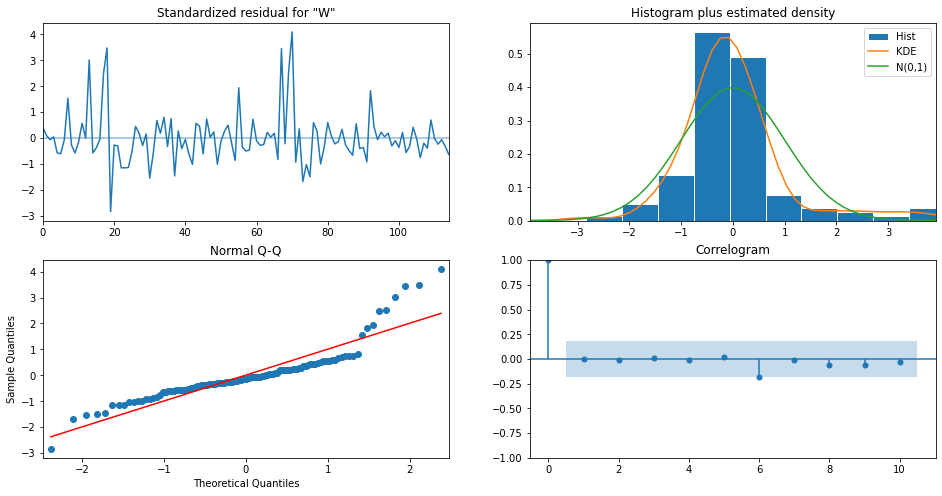

In [15]:
model2_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

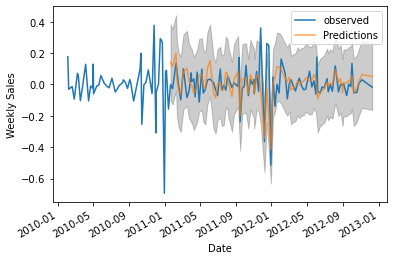

In [35]:
results=model2_fit
start_forecast = 50
pred = results.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = data['Weekly_Sales'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()

plt.show()

In [36]:
x=pd.DataFrame({'forecast':model2_fit.predict(start = 142, end = 191, dynamic= True)})
x.index=pd.date_range('2012-11-05', periods=50, freq='W-FRI')
x=pd.concat([data,x])

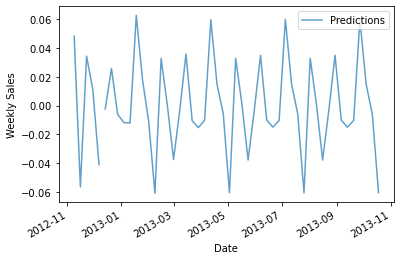

In [37]:
#predictions
ax=x.forecast.plot(label='Predictions', alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

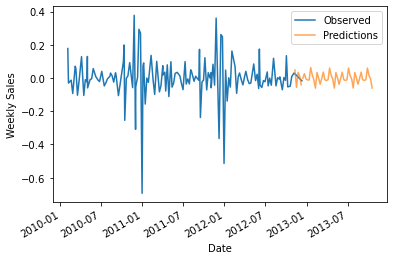

In [38]:
ax = data['Weekly_Sales'].plot(label='Observed')
x.forecast.plot(ax=ax, label='Predictions', alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

In [39]:
#evaluation
y_true=data['Weekly_Sales']
y_pred=model2_fit.fittedvalues
mae = mean_absolute_error(y_true, y_pred)
print("MAE: ", mae)

mse = mean_squared_error(y_true, y_pred)
print("MSE: ", mse)

rmse = root_mean_squared_error(y_true, y_pred)
print("RMSE: ", rmse)

MAE:  0.07481489038100851
MSE:  0.012979221202218399
RMSE:  0.1139263850133866


## To forecast sales for each retail store for 12 weeks

In [41]:
def forecast(df,store_num):
    store_data=df[df['Store']==store_num]
    store_data.index=pd.to_datetime(store_data['Date'])
    store_data.drop(['Date','Store','Holiday_Flag','Temperature','Fuel_Price','CPI',"Unemployment"], axis = 1, inplace = True)
    model=SARIMAX(store_data['Weekly_Sales'],order=(4,0,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
    model_fit=model.fit()
    forecast_df=pd.DataFrame(model_fit.forecast(steps=24))
    rng = pd.date_range(start='2012-12-10',end='2013-03-10', periods=24)
    forecast_df.loc[:,"Date"]=rng
    forecast_df.index=pd.to_datetime(forecast_df['Date'])
    forecast_df.drop(['Date'], axis = 1, inplace = True)
    forecast_df.rename(columns={'predicted_mean':'Weekly_Sales'},inplace=True)
    combined_df = pd.concat([store_data, forecast_df])
    combined_df["store_num"]=store_num
    combined_df.reset_index(inplace=True)
    return combined_df

In [42]:
df_allstores_forecast=pd.DataFrame(columns=["Date","Weekly_Sales","store_num"])
df_allstores_forecast

Empty DataFrame
Columns: [Date, Weekly_Sales, store_num]
Index: []

In [43]:
for store_num in df.Store.unique():
    df_allstores_forecast=pd.concat([df_allstores_forecast,forecast(df,store_num)],axis=0)
df_allstores_forecast=df_allstores_forecast.sort_values(by=['store_num','Date'])
import plotly.express as px
import plotly.graph_objects as go
fig=px.line(df_allstores_forecast,x='Date',y='Weekly_Sales',color='store_num')
fig.show()
fig.write_html("temp.html",auto_open=True)

### Insights

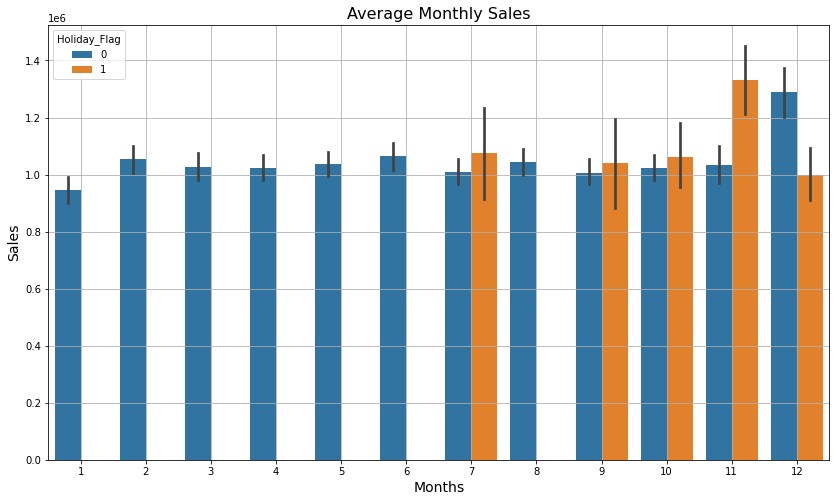

In [49]:
#Average Monthly Sales
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',hue='Holiday_Flag',data=df)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

* From the visualization november is having highest sales and in particular with holiday flag than without holiday flag 
* December is quite contrast where without holilday flag has highest sales than with holiday flag sales.
* Overall 7-12 month has higher sales than remaining months of the year

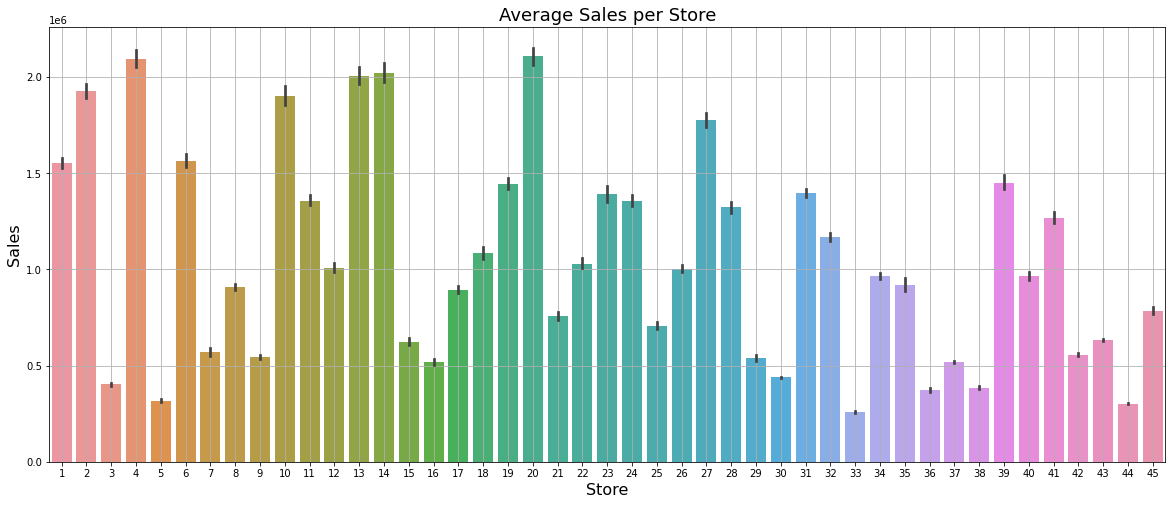

In [17]:
#Average Weekly Sales Store wise

plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

* Store 20 is having the highest sales. 
* 4,13,14 stores are next highest sales

<AxesSubplot:xlabel='Year', ylabel='CPI'>

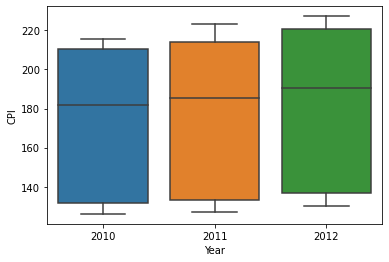

In [50]:
sns.boxplot(y="CPI",x="Year",data=df)

* CPI has increased over years

<AxesSubplot:xlabel='Weekly_Sales', ylabel='CPI'>

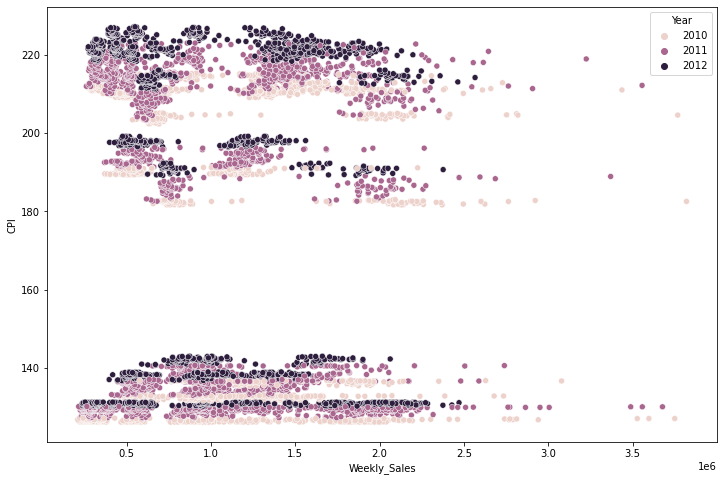

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="CPI",x="Weekly_Sales",data=df,hue='Year')

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

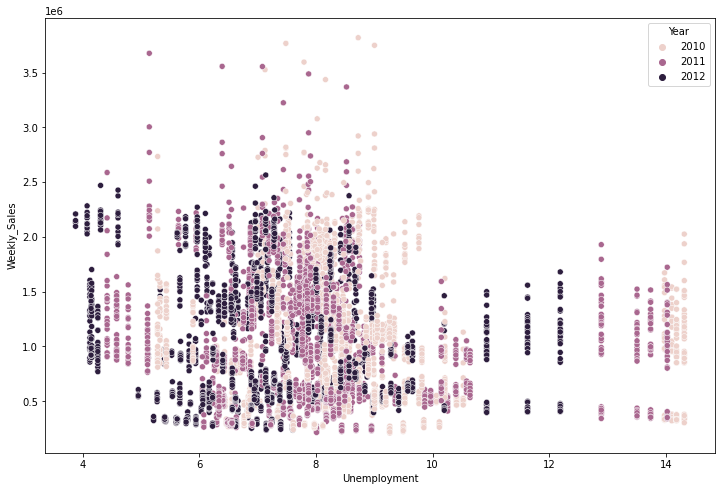

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Unemployment",y="Weekly_Sales",data=df,hue='Year')

* Lower the unemployment higher the sales.

In [54]:
# Precisely forecast sales for each retail store for the next 12 weeks.
fig.show()